# Martian Landmark Classifier

This project is a fully deployed Martian Landmark Classifier. In this notebook, we build and train our deep learning neural network on the Mars orbital image (HiRISE) labeled data set version 3.2 to classify a given input image into one of the following categories of Martian landscapes:

* bright dune
* dark dune
* crater
* slope streak
* impact ejecta
* spider
* swiss cheese
* other


*From the data source*:

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4002935.svg)](https://doi.org/10.5281/zenodo.4002935)

This dataset contains a total of 64,947 landmark images that were detected and extracted from HiRISE browse images, spanning 232 separate source images.

This set was formed from 10,815 original landmarks. Each original landmark was cropped to a square bounding box that included the full extent of the landmark plus a 30-pixel margin to the left, right, top, and bottom. Each landmark was then resized to 227x227 pixels. 9,022 of these images were then augmented to generate 6 additional landmarks using the following methods:

1. 90 degrees clockwise rotation
2. 180 degrees clockwise rotation
3. 270 degrees clockwise rotation
4. Horizontal flip
5. Vertical flip
6. Random brightness adjustment

The remaining 1,793 images were not augmented. Combining these with the 7*9,022 images, gives a total of 64,947 separate images.

## Class Descriptions

*From the data source*:

* Bright dune and dark dune are two sand dune classes found on Mars. Dark dunes are completely defrosted, whereas bright dunes are not. Bright dunes are generally bright due to overlying frost and can exhibit black spots where parts of the dune are defrosting.

* The crater class consists of crater images in which the diameter of the crater is greater than or equal to $\frac{1}{5}$ the width of the image and the circular rim is visible for at least half the crater's circumference.

* The slope streak class consists of images of dark flow-like features on slopes. These features are believed to be formed by a dry process in which overlying (bright) dust slides down a slope and reveals a darker sub-surface.

* Impact ejecta refers to material that is blasted out from the impact of a meteorite or the eruption of a volcano. We also include cases in which the impact cleared away overlying dust, exposing the underlying surface. In some cases, the associated crater may be too small to see. Impact ejecta can also include lava that spilled out from the impact (blobby ("lobate") instead of blast-like), more like an eruption (triggered by the impact). Impact ejecta can be isolated, or they can form in clusters when the impactor breaks up into multiple fragments.

* Spiders and Swiss cheese are phenomena that occur in the south polar region of Mars. Spiders have a central pit with radial troughs, and they are believed to form as a result of sublimation of carbon dioxide ice. This process can produce mineral deposits on top, which look like dark or light dust that highlights cracks in the $CO_2$ ice.  Spiders can resemble impact ejecta due to their radial troughs, but impact ejecta tends to have straight radial jets that fade as they get farther from the center.  The spider class also includes fan-like features that form when a geyser erupts through the $CO_2$ layer and the material is blown by the wind away from the cracks. Fans are typically unidirectional (following the wind direction), whereas impact ejecta often extends in multiple directions. Swiss cheese is a terrain type that consists of pits that are formed when the sun heats the ice making it sublimate (change solid to gas).

* Other is a catch-all class that contains images that fit none of the defined classes of interest. This class makes up the majority of our data set.

Download and unzip the dataset. 

In [ ]:
# Code source: https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url
import requests, zipfile, io
r = requests.get("https://zenodo.org/record/4002935/files/hirise-map-proj-v3_2.zip?download=1")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./")

Now we install and import TensorFlow, which is the deep learning framework for our model as well as the basis for our deloyment pipeline -- TFX.

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 4.9 MB/s 


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras import Model

TensorFlow version: 2.8.0


## Model Initializations

For the sake of readability, we initialize our TensorFlow model dependencies here in the global namespace. More specifically, we are using TensorFlow's Keras submodules. 

In [ ]:
# Categorical Encoding
to_categorical =      tf.keras.utils.to_categorical

# Sequential Layer Architecture
Sequential =          tf.keras.models.Sequential

# CNN Layer States
Dense =               tf.keras.layers.Dense
Dropout =             tf.keras.layers.Dropout
Flatten =             tf.keras.layers.Flatten
Conv2D =              tf.keras.layers.Conv2D
MaxPool2D =           tf.keras.layers.MaxPool2D

# Gradient Optimizers
# RMSprop =             tf.keras.optimizers.RMSprop
Adam =                tf.keras.optimizers.Adam
# Nadam =               tf.keras.optimizers.Nadam

## Configurations and Data Pre-processing

Declare number of output classes.

In [ ]:
NUM_CLASSES = 7 #or 8? Is other included?

Load and prepare the dataset.

In [ ]:
from PIL import Image # Image manipulations
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

In [ ]:
import numpy as np

x_train = np.array([])
x_test = np.array([])
x_val = np.array([])
y_train = np.array([])
y_test = np.array([])
y_val = np.array([])

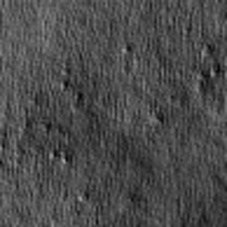

In [ ]:
# Example image
Image.open("/content/hirise-map-proj-v3_2/map-proj-v3_2/ESP_011283_2265_RED-0013-brt.jpg")

Build the `tf.keras` model using the Keras [model subclassing API](https://www.tensorflow.org/guide/keras#model_subclassing). We use convolutional layers to help our model capture and process image features.

*500+ images overloaded the RAM. Options:*


1. Use local Jupyter notebook
2. Use tf.keras.preprocessing.image_dataset_from_directory  to pull in images from a folder (like in DeepFire)
2. Make the model leaner
* Use `model.fit_generator` instead of `model.fit`
* Flatten/condense convolutional layers
* Reduce dense layer nodes
* Hyperparameter tuning
* Reducing image sizes (227 -> below 150); may reduce accuracy
* Pre-built TFX component optimization
  * Data feed (complex, but doesn't require saving data in memory)







In [ ]:
source = "hirise-map-proj-v3_2/map-proj-v3_2/"


with open("hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.txt") as f:
  data = f.read().split("\n")

  for i, image_label in enumerate(data):
    if i >= 400:
      break
    path = image_label.split(" ")
    image = path[0]

    if len(path) > 1:
      label = path[1]
      typ = path[2]

    if typ == "train":
      image_data = load_img(f"hirise-map-proj-v3_2/map-proj-v3_2/{image}", color_mode="grayscale")
      x_train = np.append(x_train, image_data)
      y_train = np.append(y_train, int(label))

    if typ == "test":
      image_data = load_img(f"hirise-map-proj-v3_2/map-proj-v3_2/{image}", color_mode="grayscale")
      x_test = np.append(x_test, image_data)
      y_test = np.append(y_test, int(label))

    if typ == "val":
      image_data = load_img(f"hirise-map-proj-v3_2/map-proj-v3_2/{image}", color_mode="grayscale")
      x_val = np.append(x_val, image_data)
      y_val = np.append(y_val, int(label))
            

                
print(x_train)


[198. 195. 192. ...  62.  61.  61.]


Normalize the images and reshape them.

In [ ]:
# Image Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [ ]:
print(x_train.shape)

(20611600,)


In [ ]:
print(x_train.shape)

(20611600,)


In [ ]:
# Image Reshaping
x_train = x_train.reshape(-1, 227, 227, 1)
x_test = x_test.reshape(-1, 227, 227, 1)

x_val = x_val.reshape(-1, 227, 227, 1)

### Need y_train to be zero-indexed for label encoding

In [ ]:
y_train -= 1
y_val -= 1

Encode the labels.

In [ ]:
# Label Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)

In [ ]:
# Two convolutional layer steps to create feature mapping
convolutional_layer_1 =   Conv2D(50,
                                kernel_size=(3, 3),
                                strides=(1, 1),
                                padding="same",
                                activation="relu",
                                input_shape=(227, 227, 1))
convolutional_layer_2 =   Conv2D(125,
                                kernel_size=(3, 3),
                                strides=(1, 1),
                                padding="same",
                                activation="relu")

# Two corresponding pooling layers to reduce convolved dimensionality
pooling_layer_1 =         MaxPool2D(pool_size=(2, 2))
pooling_layer_2 =         MaxPool2D(pool_size=(2, 2), 
                                    strides=(2, 2))

# Three dropout layers: two for the convolutions and one for the ANN
dropout_layer_1 =         Dropout(0.25)


dropout_layer_2 =         Dropout(0.25)
dropout_layer_3 =         Dropout(0.5)

# A flattening layer for ingestion into the ANN
flattening_layer_1 =      Flatten()

# Two dense layers to make up the significant ANN architecture
connective_layer_1 =      Dense(256, 
                                activation="relu")
output_layer =            Dense(NUM_CLASSES, 
                                activation="softmax")

In [ ]:
# Initialize sequential model schema
model = Sequential()

# Add first two convolutional feature mapping process layers
model.add(convolutional_layer_1)
model.add(pooling_layer_1)
model.add(dropout_layer_1)

# Add second convolutional feature mapping process layers
model.add(convolutional_layer_2)
model.add(pooling_layer_2)
model.add(dropout_layer_2)

# Add image vectorization process layer
model.add(flattening_layer_1)

# Add connective ANN process layers
model.add(connective_layer_1)
model.add(dropout_layer_3)
model.add(output_layer)

# Summarize model layering setup
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 50)      500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 50)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 113, 113, 50)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 125)     56375     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 125)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 125)       0

In [ ]:
# Define Adam optimization
optimizer = tf.keras.optimizers.Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Set compilation properties
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Set epochs and batch size
epochs, batch_size = 10, 250

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 50)      500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 50)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 113, 113, 50)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 125)     56375     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 125)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 125)       0

In [ ]:
# Fit model using generator-augmented dataset and mini-batch ingestion
history = model.fit(x_train, y_train,
    epochs=epochs,
    # validation_data=(x_test, y_test),
    # steps_per_epoch=int(x_train.shape[0] // batch_size)
)

Epoch 1/10
13/13 [==============================] - 77s 6s/step - loss: 8.4937 - accuracy: 0.3975
Epoch 2/10
13/13 [==============================] - 73s 6s/step - loss: 1.1912 - accuracy: 0.4900
Epoch 3/10
13/13 [==============================] - 74s 6s/step - loss: 0.8119 - accuracy: 0.6550
Epoch 4/10
13/13 [==============================] - 74s 6s/step - loss: 0.6627 - accuracy: 0.7425
Epoch 5/10
13/13 [==============================] - 75s 6s/step - loss: 0.5188 - accuracy: 0.7850
Epoch 6/10
13/13 [==============================] - 74s 6s/step - loss: 0.4548 - accuracy: 0.8175
Epoch 7/10
13/13 [==============================] - 73s 6s/step - loss: 0.4360 - accuracy: 0.8300
Epoch 8/10
13/13 [==============================] - 77s 6s/step - loss: 0.2996 - accuracy: 0.8750
Epoch 9/10
13/13 [==============================] - 75s 6s/step - loss: 0.2502 - accuracy: 0.9050
Epoch 10/10
13/13 [==============================] - 74s 6s/step - loss: 0.2084 - accuracy: 0.9300


In [ ]:
# Save model objects - predictor and scaler object
model.save('mars_landmark_classifier_model.h5')

In [ ]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## **Deploying the model**

In [ ]:
! pip install flask_ngrok

In [ ]:
! curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok
            

In [ ]:
! ngrok config add-authtoken 29CqXvMwYWUTWGeBHWZuIbovyre_884qeE76QC4qeH9tsNDj2

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [184]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)

run_with_ngrok(app)

model = pickle.load(open('/content/model_pkl', 'rb'))


@app.route('/')
def index_view():
    #return index.html in templates folder
    return '<html lang="en"> <head> <meta charset="UTF-8"> <meta name="viewport" content="width=device-width, initial-scale=1.0"><meta http-equiv="X-UA-Compatible" content="ie=edge"><title>Mars Classifier</title> <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous"> <link rel="stylesheet" href="css/style.css"></head><body><div class="container"><div class="row"><div class="col-md-12"><h1>Upload an image to predict</h1><form action="/predict" method="post" enctype="multipart/form-data"><input type="file" name="image"> <input type="submit" name="submit" value="Predict"></form></div></div></body></html>'


@app.route('/predict/',methods=['GET','POST'])
def predict():
	# load an image from a file passed in the input field in index.html, and resize it to 128x128x3 pixels
    if request.method == 'POST':
        img = request.files['image'].read()
        img = base64.b64decode(img)
        img = np.frombuffer(img, dtype=np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = img.astype(np.float32)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0
        with graph.as_default():
            pred = model.predict(img)
            pred = np.argmax(pred, axis=1)
            pred = pred[0]
            print(pred)
            return str(pred)
    return "error"

app.run()

 * Running on http://f70b-104-196-195-101.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading library
# import pickle

In [ ]:
# # create an iterator object with write permission - model.pkl
# with open('model_pkl', 'wb') as files:
#     pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://168674c2-c99d-45d9-aaee-7e3d22cd21a2/assets


In [ ]:
# ! pip install flask-ngrok

In [ ]:
# # # imports
# # !pip3 install keras
# from keras import model_from_json 

# # opening and store file in a variable

# json_file = open('model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()

# # use Keras model_from_json to make a loaded model

# loaded_model = model_from_json(loaded_model_json)

# # load weights into new model

# loaded_model.load_weights("model.h5")
# print("Loaded Model from disk")

# # compile and evaluate loaded model

# loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


ImportError: ignored

# Alternate model

In [ ]:
class ConvModel(Model):
  def __init__(self):
    super(ConvModel, self).__init__()
    # Three convolutional layer steps to create more complex feature mapping
    # Two corresponding pooling layers to reduce convolved dimensionality
    # Four dropout layers: two for the convolutions and two for the ANN
    # A flattening layer for ingestion into the ANN
    # Three dense layers to make up the significant ANN architecture
    self.conv1 = Conv2D(50,
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        activation="relu",
                        input_shape=(10, 227, 227, 1))
    self.conv2 = Conv2D(75,
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        activation="relu")
    self.pool1 = MaxPool2D(pool_size=(2, 2))
    self.dropout1 = Dropout(0.25)
    self.conv3 = Conv2D(125,
                        kernel_size=(3, 3),
                        strides=(1, 1),
                        padding="same",
                        activation="relu")
    self.pool2 = MaxPool2D(pool_size=(2, 2))
    self.dropout2 = Dropout(0.25)
    self.flatten = Flatten()
    self.d1 = Dense(500, activation="relu")
    self.dropout3 = Dropout(0.3)
    self.d2 = Dense(250, activation="relu")
    self.dropout4 = Dropout(0.35)
    self.dense_output = Dense(NUM_CLASSES, activation="softmax")


  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = ConvModel()

In [ ]:
# Grayscale Validation - DON'T DELETE
for i in range(0, len(x_train) - 3, 3):
  if not (x_train[i] == x_train[i+1] and x_train[i] == x_train[i+2]):
    print(i)